<a href="https://colab.research.google.com/github/VinayProgram/machine-learning/blob/main/wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
data=load_wine()
normalDataFrame=pd.DataFrame(data['data'],columns=data['feature_names'])
features = np.arange(1, 14)
scaler = MinMaxScaler(feature_range=(0, 100))
X_scaled = scaler.fit_transform(data['data'])
y = data['target']
# X_scaled = pd.DataFrame(X_scaled, columns=data['feature_names'])
# X_scaled.head()
# normalDataFrame.head()

/tmp/ipython-input-616130594.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


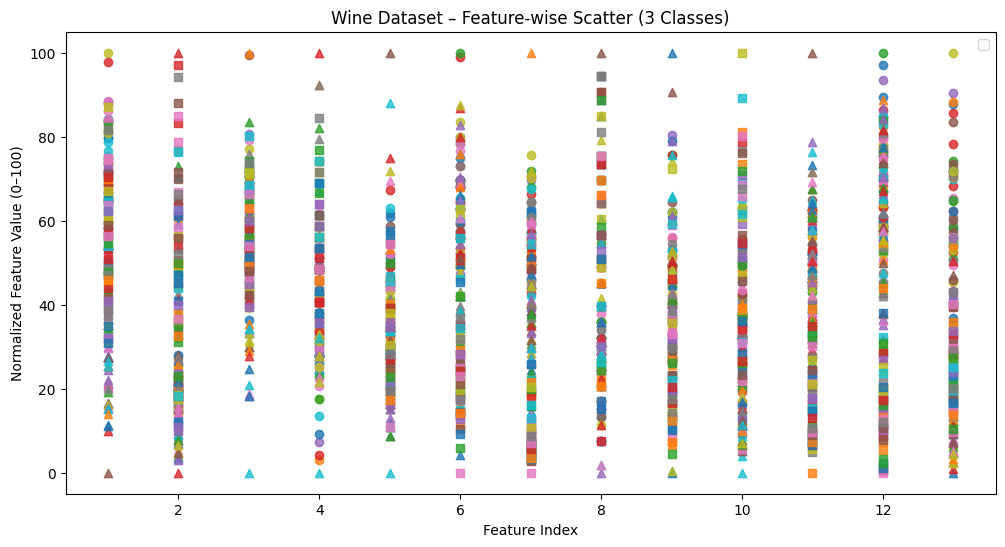

In [ ]:
features = np.arange(1, X_scaled.shape[1] + 1)
targets = data['target']

markers = {0: 'o', 1: '^', 2: 's'}

plt.figure(figsize=(12, 6))

for class_label in np.unique(targets):
    class_data = X_scaled[targets == class_label]

    for row in class_data:
        plt.scatter(
            features,
            row,
            marker=markers[class_label],
            alpha=0.8,
            label=f"Class {class_label}" if row is class_data[0] else ""
        )

plt.xlabel("Feature Index")
plt.ylabel("Normalized Feature Value (0–100)")
plt.title("Wine Dataset – Feature-wise Scatter (3 Classes)")
plt.legend()
plt.show()


In [ ]:
# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
class WineNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 3)

    def forward(self, x):
        x = self.fc1(x)
        # x = self.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
model = WineNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

for epoch in range(200):
    optimizer.zero_grad()
    outputs = model(torch.Tensor(X_train))
    loss = criterion(outputs, torch.LongTensor(y_train))
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        y_pred = model(torch.Tensor(X_test))
        y_pred_classes = torch.argmax(y_pred, dim=1)
        acc = accuracy_fn(torch.LongTensor(y_test), y_pred_classes)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f} acc {acc}")


Epoch 0, Loss: 12.0471 acc 38.88888888888889
Epoch 100, Loss: 0.0262 acc 100.0


prediction [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


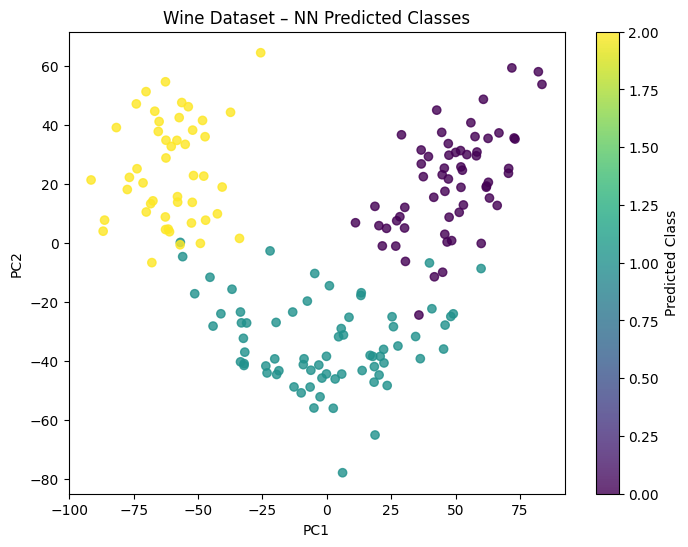

In [ ]:
from sklearn.decomposition import PCA

model.eval()
with torch.no_grad():
    logits = model(torch.Tensor(X_scaled))
    y_pred_all = torch.argmax(logits, dim=1).numpy()
print('prediction',y_pred_all)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=y_pred_all,
    cmap='viridis',
    alpha=0.8
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Dataset – NN Predicted Classes")
plt.colorbar(label="Predicted Class")
plt.show()


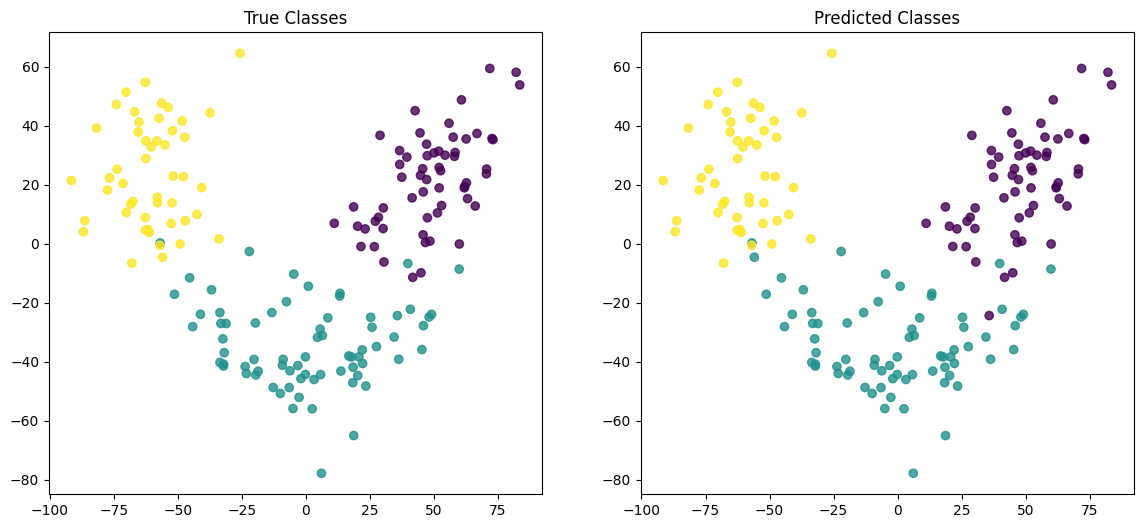

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', alpha=0.8)
ax[0].set_title("True Classes")

ax[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred_all, cmap='viridis', alpha=0.8)
ax[1].set_title("Predicted Classes")

plt.show()
